<a href="https://colab.research.google.com/github/ridvanyigit/Tensorflow-2.0/blob/main/Malaria_Parasite_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Malaria Parasite Detection Using CNN

Dataset: https://lhncbc.nlm.nih.gov/publication/pub9932

Paper: https://lhncbc.nlm.nih.gov/system/files/pub9752.pdf

#### Import Libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam



In [42]:
tf.__version__

'2.18.0'

Clone Dataset from GitHub Repository

In [43]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

fatal: destination path 'Malaria-Classification-Using-CNN' already exists and is not an empty directory.


#### Define Parameters

In [44]:
img_width = 64
img_height = 64
batch_size = 32
epochs = 15

#### ImageDataGenerator Setup

In [45]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
    )

#### Load Data Generators

In [46]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset='training')

validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN/malaria-dataset',
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset='validation')

Found 22048 images belonging to 2 classes.


Check Training Labels

In [48]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

## Build CNN Model

In [49]:
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

#### Compile Model

In [51]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

#### Train Model

In [52]:
history = model.fit(
    train_data_generator,
    steps_per_epoch=train_data_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_data_generator,
    validation_steps=len(validation_data_generator))

Epoch 1/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 95s 134ms/step - accuracy: 0.5497 - loss: 0.6856 - val_accuracy: 0.6621 - val_loss: 0.6402
Epoch 2/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 143s 135ms/step - accuracy: 0.6569 - loss: 0.6256 - val_accuracy: 0.6808 - val_loss: 0.6127
Epoch 3/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 93s 135ms/step - accuracy: 0.6787 - loss: 0.6002 - val_accuracy: 0.7191 - val_loss: 0.5821
Epoch 4/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 93s 134ms/step - accuracy: 0.6956 - loss: 0.5791 - val_accuracy: 0.7436 - val_loss: 0.5524
Epoch 5/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 142s 134ms/step - accuracy: 0.7141 - loss: 0.5565 - val_accuracy: 0.7675 - val_loss: 0.5297
Epoch 6/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 142s 134ms/step - accuracy: 0.7455 - loss: 0.5299 - val_accuracy: 0.8285 - val_loss: 0.4546
Epoch 7/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 92s 134ms/step - accuracy: 0.7787 - loss: 0.4887 - val_accuracy: 0.8577 - val_loss: 0.3910
Epoch 8/15
689/689 ━━━━━━━━━━━━━━━━━━━━ 93s 135ms/step - accuracy: 0.8179 - loss

View Training History

In [53]:
history.history

{'accuracy': [0.5916182994842529,
  0.6605587601661682,
  0.6816037893295288,
  0.6999728083610535,
  0.7174800634384155,
  0.7507256865501404,
  0.7904118299484253,
  0.8265602588653564,
  0.8570845723152161,
  0.8773584961891174,
  0.8912373185157776,
  0.9012609124183655,
  0.9125544428825378,
  0.9156386256217957,
  0.922124445438385],
 'loss': [0.6651313900947571,
  0.6221765875816345,
  0.5992839336395264,
  0.576160192489624,
  0.5535352826118469,
  0.5168643593788147,
  0.4725414514541626,
  0.41169217228889465,
  0.3585919737815857,
  0.314962774515152,
  0.2835128605365753,
  0.26205191016197205,
  0.2422206699848175,
  0.2295278012752533,
  0.21710537374019623],
 'val_accuracy': [0.6620689630508423,
  0.6807622313499451,
  0.719056248664856,
  0.7435571551322937,
  0.767513632774353,
  0.8284936547279358,
  0.8577132225036621,
  0.8907440900802612,
  0.9067150354385376,
  0.9001814723014832,
  0.9059891104698181,
  0.9143375754356384,
  0.9217785596847534,
  0.91996371746063

#### Define Plot Function

In [54]:
def plot_learningCurve(history, epochs):
  epoch_range=range(1, epochs+1)
  # plot training & validadion accuracy values
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

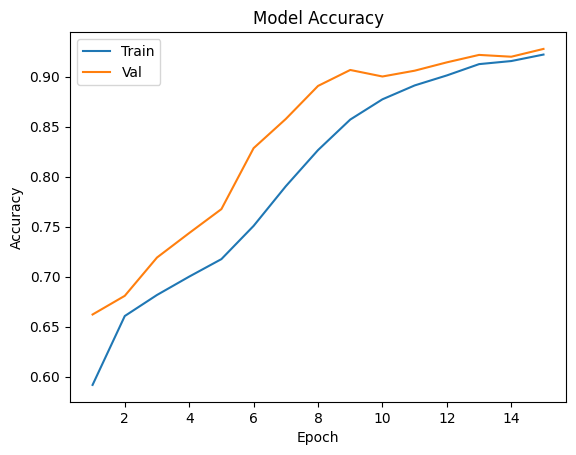

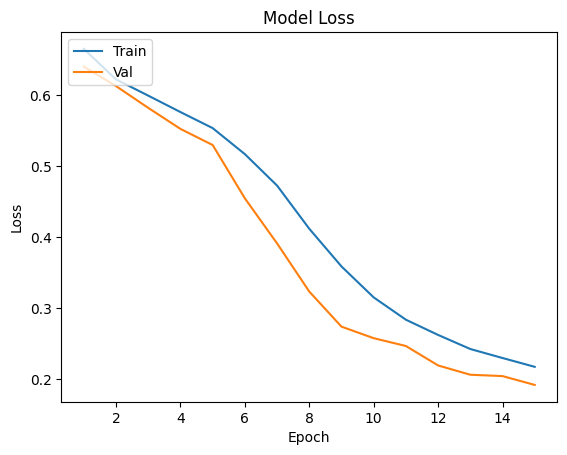

In [56]:
plot_learningCurve(history, 15)